In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Tensorflow.keras is popular deep learning module in python. In this notebook, we will practice some basic DL models using Keras.

# **0. ML and DL**

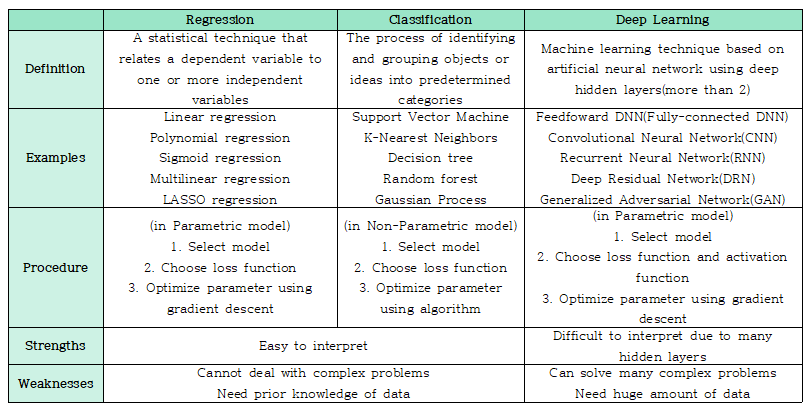

# **1. Feedforward DNN**

**1) Circle data Classification**

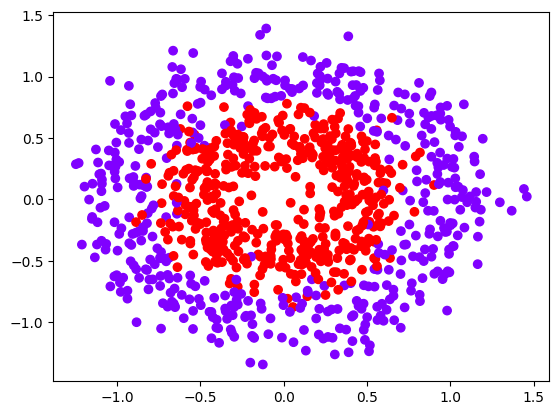

In [3]:
from sklearn.datasets import make_moons, make_circles
Circle_xtrain,Circle_ytrain=make_circles(noise=0.15, factor=0.5, random_state=1,n_samples=10000)
Circle_xtest,Circle_ytest=make_circles(noise=0.15, factor=0.5, random_state=5,n_samples=1000)
plt.scatter(Circle_xtest[:,0],Circle_xtest[:,1],c=Circle_ytest,cmap='rainbow')

We have 10000 data points to train the model(gradient descent), and 1000 data points to test the accuracy of the model.

In [4]:
Circle_xtrain.shape

(10000, 2)

**Sequential()** : creating sequential model

**.add** : Add layer to model

**layers.InputLayer()** : Create a input layer

**layers.Dense()** Create a Fully connected layer

**.summary()**  : Shows summary of the model

In [5]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

**.compile()** : Set loss function and optimizer

**.fit()** : Fit the data

**.evaluate()** : Evaluate accuracy from the test data

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 8s 6ms/step - loss: 0.3398 - acc: 0.8865
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1903 - acc: 0.9439
Epoch 3/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1615 - acc: 0.9465
Epoch 4/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1509 - acc: 0.9469
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1567 - acc: 0.9440


[0.15668639540672302, 0.9440000057220459]

**Gradient vanishing**

DNN optimizes parameter using modified gradient method. In deep layers, we need to apply chain rule to calculate the derivatives. Since most of the derivative of activation function is less than 1, it is hard to optimize parameters in deep layers. This is the gradient vanishing problem.


Derivative of ReLu(Rectified Linear Unit) function is 1 when input variable is more then 1. So we can prevent gradient vanishing problem to some extent.

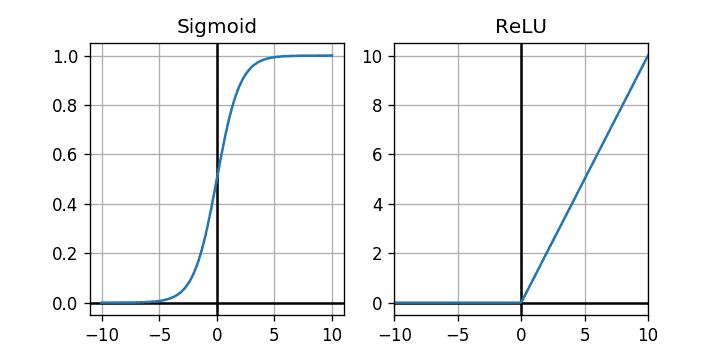

In [7]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 7s 5ms/step - loss: 0.6973 - acc: 0.4921
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6936 - acc: 0.5046
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6934 - acc: 0.5016
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6935 - acc: 0.4948
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6672 - acc: 0.6200


[0.667161762714386, 0.6200000047683716]

**Nonlinear Activation Function**

let's think about linear activation function.

Input layer: $(x_1, x_2)$

Middle layer: $(y_1,y_2) = (a_1x_1+b_1, a_2x_2+b_2)$

Output layer: $(z_1,z_2) = (c_1y_1+d_1, c_2y_2+d_2)$

$  = (c_1(a_1x_1+b_1)+d_1, c_2(a_2x_2+b_2)+d_2)$

$= (c_1a_1x_1+c_1b_1+d_1, c_2a_2x_2+c_2b_2+d_2)$

$= (e_1x_1+f_1, e_2x_2+f_2)$

$e_1=c_1a_1, f_1=c_1b_1+d_1,  e_2=c_2a_2, f_2=c_2b_2+d_2$

If we use Muptiple layers with linear activation function, this is identical to the single layer with linear activation function.

In [8]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(16, activation='linear'))
model.add(layers.Dense(16, activation='linear'))
model.add(layers.Dense(4, activation='linear'))
model.add(layers.Dense(4, activation='linear'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 10s 8ms/step - loss: 0.6960 - acc: 0.5040
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6936 - acc: 0.5093
Epoch 3/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.6936 - acc: 0.4872
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6935 - acc: 0.4965
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - acc: 0.5000


[0.693938136100769, 0.5]

In [9]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6955 - acc: 0.4910
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6951 - acc: 0.4911
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6948 - acc: 0.5002
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6945 - acc: 0.4941
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - acc: 0.6030


[0.6935833096504211, 0.6029999852180481]

Therefore, we need to use 'relu-like' function in deep layers.

**Serial structure vs Parallel structure**

Optimization using gradient descent does not give global minimum and highly depends on initial values. So we need many parallel nodes to get better optimization.

In [10]:
model=Sequential() # Serial structure
model.add(layers.InputLayer(input_shape=2))
for i in range(20):
  model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 8)                 24        
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 8)                

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 14s 8ms/step - loss: 0.4042 - acc: 0.8616
Epoch 2/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.2152 - acc: 0.9385
Epoch 3/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1782 - acc: 0.9433
Epoch 4/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1647 - acc: 0.9422
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1693 - acc: 0.9390


[0.16928116977214813, 0.9390000104904175]

In [12]:
model=Sequential() # Parallel structure
model.add(layers.InputLayer(input_shape=2))
model.add(layers.Dense(160, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 160)               480       
                                                                 
 dense_45 (Dense)            (None, 2)                 322       
                                                                 
Total params: 802 (3.13 KB)
Trainable params: 802 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 4s 3ms/step - loss: 0.3572 - acc: 0.8695
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1541 - acc: 0.9474
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1390 - acc: 0.9497
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1351 - acc: 0.9505
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1518 - acc: 0.9360


[0.15181386470794678, 0.9359999895095825]

As we can see, parallel structure is important in DNN optimization. And serial structure helps us to learn complicated tasks, so we need 'appropriate' number of layers and 'appropriate' number of parallel nodes.

**2) Mnist handwriting data classification**

In [14]:
(number_xtrain, number_ytrain), (number_xtest,number_ytest) = tf.keras.datasets.mnist.load_data()

In [15]:
number_xtrain.shape

(60000, 28, 28)

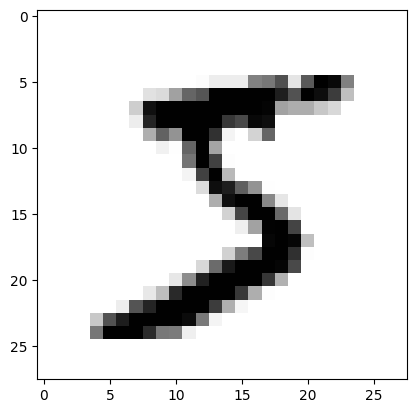

In [16]:
plt.imshow(number_xtrain[0],cmap='binary')

In [17]:
number_xtrain=number_xtrain/255  # normalization
number_xtest=number_xtest/255

**layers.Flatten()** : flatten into 1-d array

**Activation function**

In multi-class classification, softmax function is widely used. (This is generalized sigmoid function)

In [18]:
model=Sequential()
model.add(layers.InputLayer(input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                50240     
                                                                 
 dense_47 (Dense)            (None, 16)                1040      
                                                                 
 dense_48 (Dense)            (None, 10)                170       
                                                                 
Total params: 51450 (200.98 KB)
Trainable params: 51450 (200.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(number_xtrain,number_ytrain,batch_size=50,epochs=5)
model.evaluate(number_xtest,number_ytest)

Epoch 1/5
1200/1200 [==============================] - 6s 3ms/step - loss: 0.3554 - acc: 0.8963
Epoch 2/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1552 - acc: 0.9546
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1146 - acc: 0.9658
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0905 - acc: 0.9725
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1003 - acc: 0.9698


[0.10033466666936874, 0.9697999954223633]

How does this DNN model succesfully classify handwriting data? We don't know!

**3) Shuffled MNIST data classification**


5


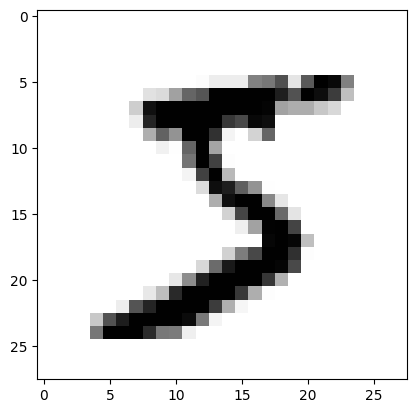

In [20]:
plt.imshow(number_xtrain[0],cmap='binary')
print(number_ytrain[0])

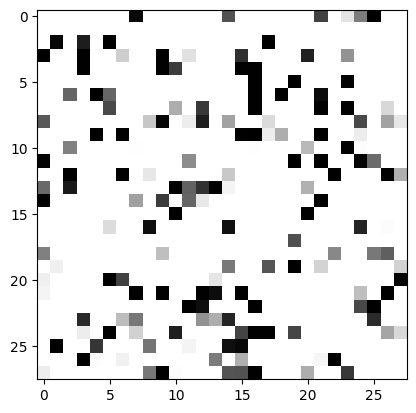

In [21]:
order=list(range(28*28))
np.random.shuffle(order)
order=np.array(order).reshape(28,28)
test_img=number_xtrain[0].flatten()[order]
plt.imshow(test_img,cmap='binary')

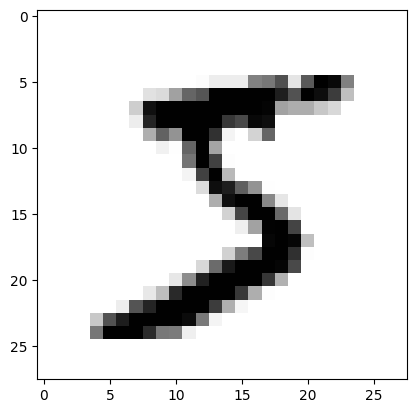

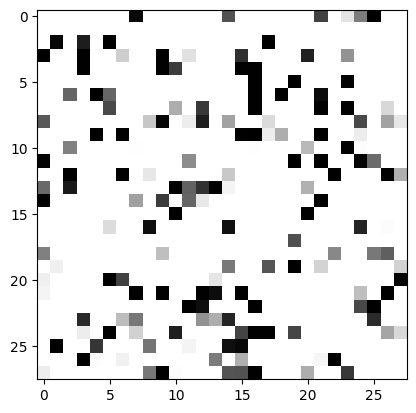

5


In [22]:
shuffled_xtrain=np.zeros([60000,28,28])
shuffled_xtest=np.zeros([10000,28,28])
shuffled_ytrain=number_ytrain
shuffled_ytest=number_ytest
for i in range(60000):
  shuffled_xtrain[i]=number_xtrain[i].flatten()[order]
for j in range(10000):
  shuffled_xtest[j]=number_xtest[j].flatten()[order]
plt.imshow(number_xtrain[0],cmap='binary')
plt.show()
plt.imshow(shuffled_xtrain[0],cmap='binary')
plt.show()
print(number_ytrain[0])

In [23]:
model=Sequential()
model.add(layers.InputLayer(input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(shuffled_xtrain,shuffled_ytrain,batch_size=50,epochs=5)
model.evaluate(shuffled_xtest,shuffled_ytest)

Epoch 1/5
1200/1200 [==============================] - 5s 3ms/step - loss: 0.3499 - acc: 0.8978
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1598 - acc: 0.9527
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1171 - acc: 0.9653
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0953 - acc: 0.9711
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0956 - acc: 0.9708


[0.09561275690793991, 0.97079998254776]

Surprisingly, DNN can recognize shuffled image data while human cannot because DNN does not.

It does not mean that feedforward DNN shows higher performance than human, but it means that image recognition using feedforwad DNN is not reliable. They should not recognize shuffled image.

To overcome this problem, we need to consider local information.

# **2. Convolutional Neural Network(CNN)**

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
(number_xtrain, number_ytrain), (number_xtest,number_ytest) = tf.keras.datasets.mnist.load_data()
number_xtrain=number_xtrain/255  # normalization
number_xtest=number_xtest/255
shuffled_xtrain=np.zeros([60000,28,28])
shuffled_xtest=np.zeros([10000,28,28])
shuffled_ytrain=number_ytrain
shuffled_ytest=number_ytest
for i in range(60000):
  shuffled_xtrain[i]=number_xtrain[i].flatten()[order]
for j in range(10000):
  shuffled_xtest[j]=number_xtest[j].flatten()[order]

CNN has 2 more layers than feedfoward DNN; convolution, pooling.

Convolution is obtaining weighted sum of nearest neighbors. In this way, we can consider local information.

Pooling is method to simplify data. We can take average value of nearest neighbors. Pooling is needed to reduce number of parameters.



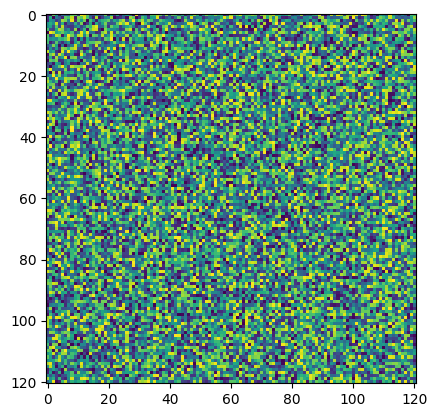

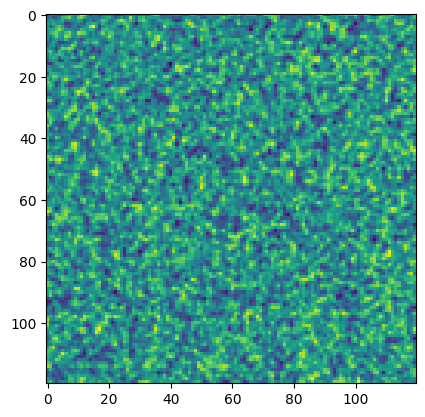

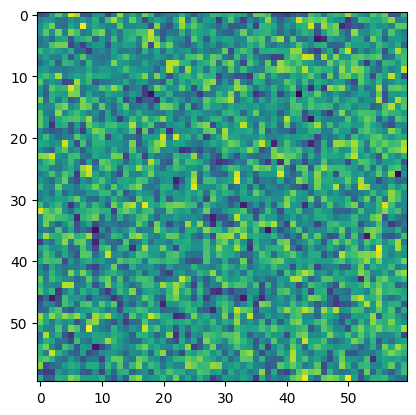

In [25]:
test=np.random.random(121*121).reshape(121,121)
plt.imshow(test)
plt.show()
result=np.zeros(120*120).reshape(120,120)
for i in range(120):
  for j in range(120):
    result[i][j]=test[i][j]+test[i+1][j]+test[i][j+1]+test[i+1][j+1]
plt.imshow(result)
plt.show()
pool=np.zeros(60*60).reshape(60,60)
for i in range(60):
  for j in range(60):
    pool[i][j]=max(result[2*i][2*j],result[2*i+1][2*j],result[2*i][2*j+1],result[2*i+1][2*j+1])
plt.imshow(pool)
plt.show()

**layers.Conv2D()** : Create 2D convolution layer

input_shape : Shape of input image

filters : The number of convolution layer

kernel_size : Size of the convolutional filter

padding : size of the extra boundary area to keep the size after convolution.

strides : choose how long filter moves.

**layers.MaxPool2D()** : Maximum pooling

**layers.AveragePooling2D()** : average pooling

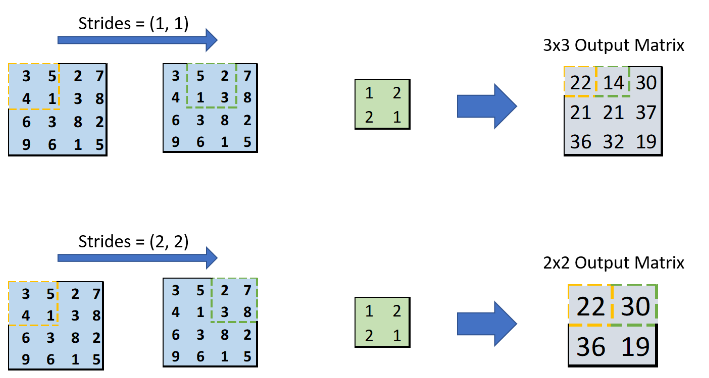

In [26]:
model=Sequential()
model.add(layers.Conv2D(input_shape=(28,28,1), kernel_size=(4, 4),filters=6, activation='relu', padding='same'))
model.add(layers.Conv2D(12, (4, 4), activation='relu', padding='same'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(24, (4, 4), activation='relu', padding='same'))
model.add(layers.Conv2D(48, (4, 4), activation='relu', padding='same'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.10))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         102       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 12)        1164      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 12)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 24)        4632      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 48)        18480     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 48)          0         
 g2D)                                                 

If layers are deep, we 'turn off' some of the nodes and train the rest. In this way, we can avoid overfitting problem.

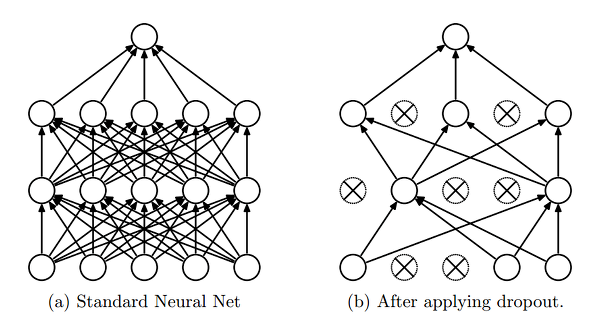

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(number_xtrain,number_ytrain,batch_size=50,epochs=5)
model.evaluate(number_xtest,number_ytest)

Epoch 1/5
1200/1200 [==============================] - 9s 5ms/step - loss: 0.1573 - acc: 0.9500
Epoch 2/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0495 - acc: 0.9847
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0356 - acc: 0.9886
Epoch 4/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0279 - acc: 0.9912
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0238 - acc: 0.9922


[0.02381839230656624, 0.9922000169754028]

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(shuffled_xtrain,shuffled_ytrain,batch_size=50,epochs=5)
model.evaluate(shuffled_xtest,shuffled_ytest)

Epoch 1/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.3870 - acc: 0.8798
Epoch 2/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1626 - acc: 0.9500
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1172 - acc: 0.9638
Epoch 4/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0878 - acc: 0.9717
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1272 - acc: 0.9647


[0.12723489105701447, 0.9646999835968018]

This model shows high accuracy too because CNN still has DNN structure. But when noise is added to original data, CNN shows better performance.

# **3. Regression in DNN**

In [29]:
# boston housing data
from keras.datasets import boston_housing
(house_xtrain,house_ytrain),(house_xtest,house_ytest)=boston_housing.load_data(path='boston_housing.npz', test_split=0.2)

In [30]:
house_xtrain.shape

(404, 13)

In [31]:
house_xtest.shape

(102, 13)

In [32]:
# normalization
mean=house_xtrain.mean(axis=0)
std=house_xtrain.std(axis=0)
house_xtrain=(house_xtrain-mean)/std
house_xtest=(house_xtest-mean)/std

In [33]:
model_2=Sequential()
model_2.add(layers.InputLayer(input_shape=(13,)))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.15))
model_2.add(layers.Dense(64, activation='sigmoid'))
model_2.add(layers.Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])
model_2.fit(house_xtrain,house_ytrain,batch_size=1,epochs=20)
model_2.evaluate(house_xtest,house_ytest)

Epoch 1/20
404/404 [==============================] - 3s 3ms/step - loss: 253.3309 - mae: 12.5925
Epoch 2/20
404/404 [==============================] - 2s 4ms/step - loss: 71.2315 - mae: 5.4360
Epoch 3/20
404/404 [==============================] - 1s 3ms/step - loss: 50.2195 - mae: 4.5077
Epoch 4/20
404/404 [==============================] - 1s 3ms/step - loss: 37.6652 - mae: 3.7901
Epoch 5/20
404/404 [==============================] - 1s 3ms/step - loss: 29.4038 - mae: 3.3020
Epoch 6/20
404/404 [==============================] - 1s 3ms/step - loss: 24.9841 - mae: 3.0850
Epoch 7/20
404/404 [==============================] - 1s 3ms/step - loss: 22.1507 - mae: 2.8271
Epoch 8/20
404/404 [==============================] - 1s 3ms/step - loss: 19.6569 - mae: 2.8302
Epoch 9/20
404/404 [==============================] - 1s 3ms/step - loss: 19.0846 - mae: 2.7770
Epoch 10/20
404/404 [==============================] - 1s 3ms/step - loss: 17.8574 - mae: 2.7990
Epoch 11/20
404/404 [================

[17.6087589263916, 2.8132402896881104]

In [34]:
# comparison with multilinear regression
from sklearn import linear_model
regression=linear_model.LinearRegression()
regression.fit(house_xtrain,house_ytrain)
regression.score(house_xtest,house_ytest)

0.721353593462155

In [35]:
y_predict=regression.predict(house_xtest)
y_predict
np.mean(np.abs(house_ytest-y_predict))

3.464185812406719

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabete_xtrain, diabete_xtest, diabete_ytrain, diabete_ytest = train_test_split(load_diabetes()['data'],load_diabetes()['target'],test_size=0.15)
load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']